## Exploring the data

## Building graphs and looking at dependencies

In [1]:
# Importing all the required modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import sweetviz as sv
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
pio.templates.default = "none"
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Creating a dataframe for the taining data
df_train = pd.read_csv('./input/train.csv')
ids = df_train['Id'].values

In [3]:
# Describing the data
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
# List of all the different columns
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
quantitative = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in df_train.columns if df_train.dtypes[f] == 'object']

In [6]:
# List of qualitative Data Types
qualitative

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [7]:
# List of quantitative Data Types
quantitative

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

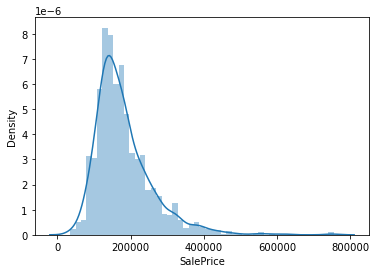

In [8]:
# Flexiblity Plot of the Sale Price
sns.distplot(df_train['SalePrice'])

### Relationship of Sale Price with Numerical Variables

In [9]:
important_features = ['LotArea', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 
                      '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt','YearRemodAdd', 'SalePrice']
DF = df_train[important_features]

#.......main plot (scatter)
fig = px.scatter(DF,x='GrLivArea',y='SalePrice',color='OverallQual',size='LotArea', width=750,height=400)

#......annotation (text)
fig.add_annotation(text="Possible outliers",xref="x", yref="y",x=6200,y=160000,showarrow = True,
                   yshift=30,xshift=-60,font=dict(family="sans serif",size=12,color="LightSeaGreen"))

#......annotation (box)
fig.add_shape(type="rect",xref="x", yref="y",x0=4500, x1=5800, y0=100000, y1=250000,
              fillcolor="lightgray", line_color="yellow",opacity=0.25)

#......update the plot as you wish
fig.update_layout(title='<b>House Price vs GrLivArea<b>',titlefont={'size': 24},template='plotly_dark')
fig.show()

In [10]:
#.......main plot (scatter)
fig = px.scatter(DF,x='TotalBsmtSF',y='SalePrice',color='OverallQual',size='LotArea',width=750,height=400)

#......annotation (text)
fig.add_annotation(text="Possible outlier",xref="x", yref="y",x=7000,y=160000,showarrow = True,
                   yshift=30,xshift=-60,font=dict(family="sans serif",size=12,color="LightSeaGreen"))

#......annotation (box)
fig.add_shape(type="rect",xref="x", yref="y",x0=5600, x1=6400, y0=100000, y1=250000,
              fillcolor="lightgray",line_color="yellow",opacity=0.25)

#......update the plot as you wish
fig.update_layout(title='<b>House Price vs TotalBsmtSF<b>',titlefont={'size': 24},template='plotly_dark')

fig.show()

### Relationship of Sale Price with Relational Variables

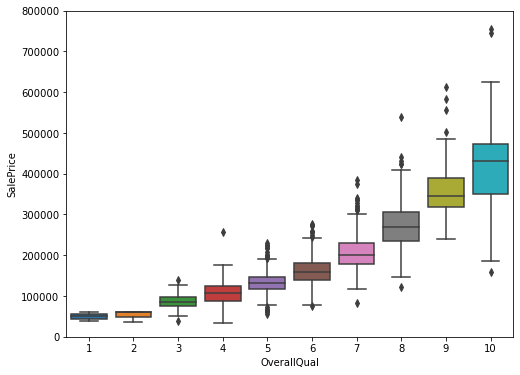

In [11]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

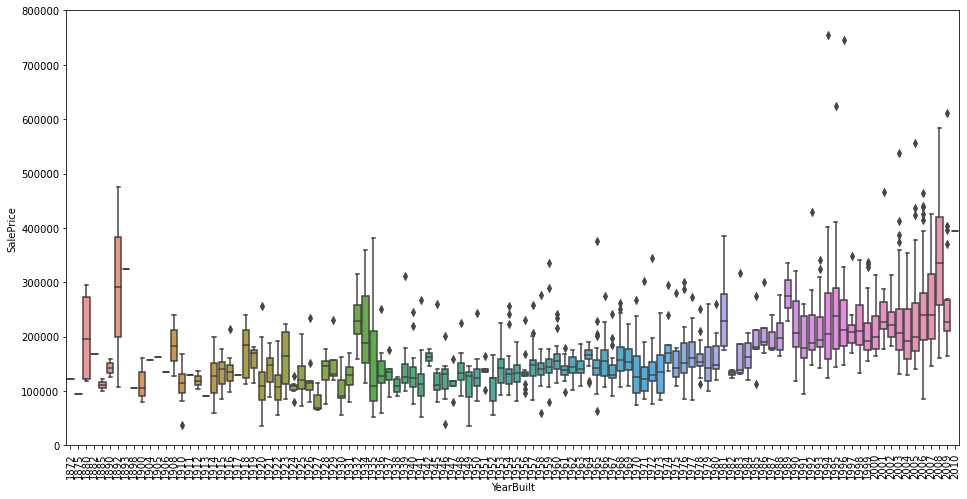

In [12]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

### Conclusions Drawn
GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'

'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

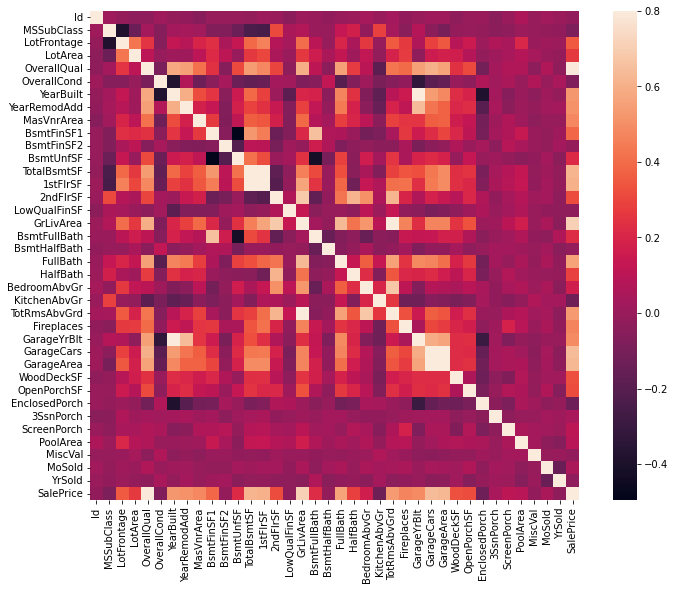

In [13]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

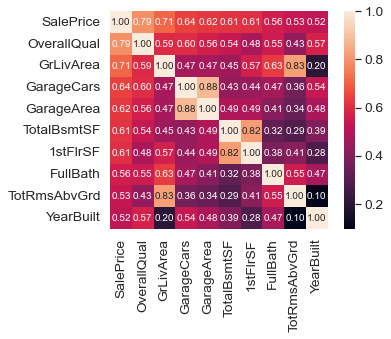

In [14]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Conclusion
'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'

'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables

'TotalBsmtSF' and '1stFloor' also seem to be twin brothers.

'TotRmsAbvGrd' and 'GrLivArea' are twin brothers again

'YearBuilt' is slightly correlated with 'SalePrice'

In [15]:
fig = make_subplots(rows=5, cols=2,specs=[[{}, {"rowspan": 2}],[{}, None],
                                          [{"rowspan": 2, "colspan": 2},None],[None, None],
                                          [{}, {}]],print_grid=True)

fig.add_trace(go.Bar(x=DF.groupby('TotRmsAbvGrd')['SalePrice'].mean().index,
                     y=DF.groupby('TotRmsAbvGrd')['SalePrice'].mean(),name="Total rooms above gr.",
                     marker_color='#a1a1a1'),row=1, col=1)
fig.add_trace(go.Scatter(x=DF['LotArea'], y=DF['SalePrice'], mode='markers', name="Lot area",
                         marker_color='lightblue'), row=1, col=2)
fig.add_trace(go.Bar(x=DF.groupby('OverallQual')['SalePrice'].mean().index,
                     y=DF.groupby('OverallQual')['SalePrice'].mean(), name="Overall quality", 
                     marker_color='lightsalmon'), row=2, col=1)
fig.add_trace(go.Scatter(x=DF['GrLivArea'], y=DF['SalePrice'], mode='markers',name="Gr living area",
                         marker_color='lightseagreen'), row=3, col=1)
fig.add_trace(go.Box(x=DF['GarageCars'],  y=DF['SalePrice'],marker_color='darkblue', name="Garage cars",
                     boxmean=True), row=5, col=1) 
fig.add_trace(go.Violin(x=DF['FullBath'],y=DF['SalePrice'],name="Full bath",box_visible=False,
                        line_color='black',meanline_visible=True, fillcolor='purple', opacity=0.6),row=5,col=2)
    
# Update xaxis properties
fig.update_xaxes(title_text="TotRmsAbvGrd",showgrid=False, row=1, col=1)
fig.update_xaxes(title_text="Lot area", showgrid=False, row=1, col=2)
fig.update_xaxes(title_text="Overall quality", showgrid=False, row=2, col=1)
fig.update_xaxes(title_text="Grd. living area", showgrid=False, row=3, col=1)
fig.update_xaxes(title_text="Garage cars", showgrid=False, row=5, col=1)
fig.update_xaxes(title_text="FullBath", showgrid=False, row=5, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="SalePrice",showgrid=False,row=1, col=1)
fig.update_yaxes(title_text="SalePrice", showgrid=False, row=1, col=2)
fig.update_yaxes(title_text="SalePrice", showgrid=False, row=2, col=1)
fig.update_yaxes(title_text="SalePrice", showgrid=False, row=3, col=1)
fig.update_yaxes(title_text="SalePrice", showgrid=False, row=5, col=1)
fig.update_yaxes(title_text="SalePrice", showgrid=False, row=5, col=2)

fig.update_layout(height=1050, width=750,showlegend=False,
                  title_text="<b>House Prices: Features highly correlated with SalePrice<b>",
                  titlefont={'size': 28, 'family':'Serif'},
                  paper_bgcolor="#ededed",plot_bgcolor='#ededed',)
fig.show()

This is the format of your plot grid:
[ (1,1) x,y   ]  ⎡ (1,2) x2,y2 ⎤
[ (2,1) x3,y3 ]  ⎣      :      ⎦
⎡ (3,1) x4,y4           -      ⎤
⎣      :                :      ⎦
[ (5,1) x5,y5 ]  [ (5,2) x6,y6 ]



### Missing Data

In [16]:
#missing data
df_train_na = (df_train.isnull().sum() / len(df_train)) * 100
df_train_na = df_train_na.drop(df_train_na[df_train_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_train_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


Text(0.5, 1.0, 'Percent missing data by feature')

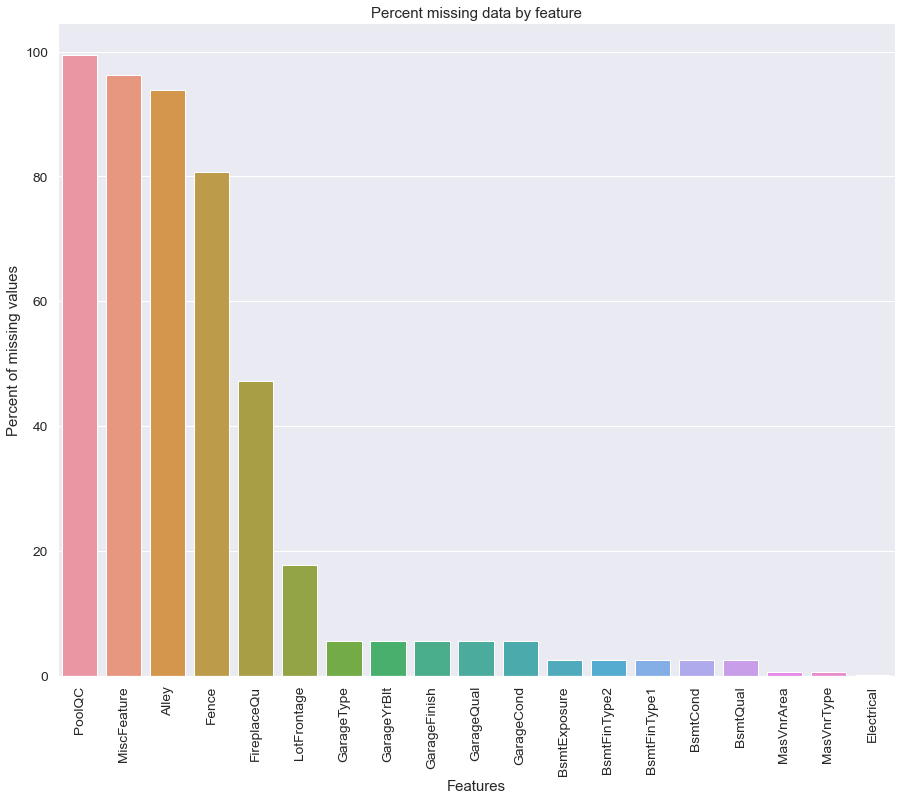

In [17]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=df_train_na.index, y=df_train_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [18]:
# #Generating a Sweetviz report
# import sweetviz as sv
# report=sv.analyze(df_train)
# report.show_html("report_on_data.html")

### Simple Clustering

In [19]:
# Encoding Qualitaive Features
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
for q in qualitative:  
    encode(df_train, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


0.7547337854846721


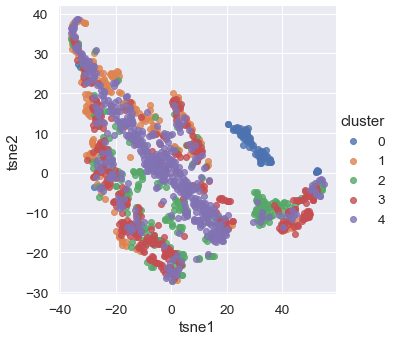

In [20]:
features = quantitative + qual_encoded
model = TSNE(n_components=2, random_state=0, perplexity=50)
X = df_train[features].fillna(0.).values
tsne = model.fit_transform(X)

std = StandardScaler()
s = std.fit_transform(X)
pca = PCA(n_components=30)
pca.fit(s)
pc = pca.transform(s)
kmeans = KMeans(n_clusters=5)
kmeans.fit(pc)

fr = pd.DataFrame({'tsne1': tsne[:,0], 'tsne2': tsne[:, 1], 'cluster': kmeans.labels_})
sns.lmplot(data=fr, x='tsne1', y='tsne2', hue='cluster', fit_reg=False)
print(np.sum(pca.explained_variance_ratio_))